In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
# input
COUNTS = "../results/counts.txt"

# output dirs
VENN_DIAGRAM_1BP = "../plots"
VENN_DIAGRAM_50_PC = "../plots"

if not os.path.exists("../plots"):
	os.makedirs("../plots")

In [3]:
# get counts
with open (COUNTS, 'r') as f:
    counts = f.read().splitlines()
    counts = [i.split(": ") for i in counts]
data = {i[0]: int(i[1]) for i in counts}
print(data)

{'G4Hunter': 109874605, 'Regex': 30306672, 'Intersect (min 1bp)': 22003704, 'Intersect (min 50%)': 21735558}


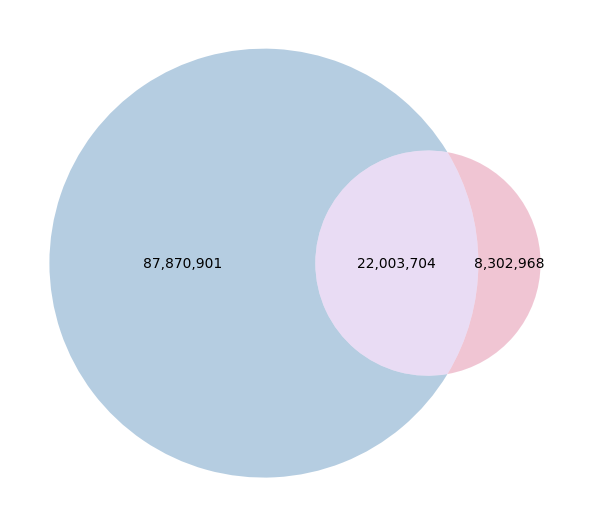

In [5]:
# plot venn diagram for 1bp overlap
plt.figure(figsize=(6, 6))
colors = ['steelblue', 'palevioletred']
v = venn2(subsets = (data['G4Hunter']-data['Intersect (min 1bp)'], data['Regex']-data['Intersect (min 1bp)'], data['Intersect (min 1bp)']), 
      set_labels = None,
      set_colors=colors,
      subset_label_formatter=lambda num: "{:,}".format(num))
plt.tight_layout()
plt.savefig(f"{VENN_DIAGRAM_1BP}/counts_venn_1bp.png", dpi=300)

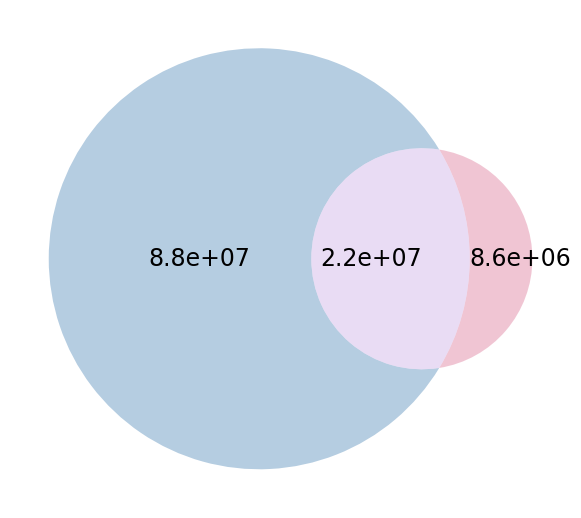

In [26]:
# plot venn diagram for 50% overlap
plt.figure(figsize=(6, 6))
v = venn2(subsets = (data['G4Hunter']-data['Intersect (min 50%)'], data['Regex']-data['Intersect (min 50%)'], data['Intersect (min 50%)']), 
	  set_labels = None,
	  set_colors=colors,
	  subset_label_formatter=lambda num: f"{num:.1e}")
# Set font size for subset labels
for i, subset_label in enumerate(v.subset_labels):
	if subset_label:
		subset_label.set_fontsize(17)
		x, y = subset_label.get_position()
		if i < 2:  # left or right subset
			subset_label.set_position((x + 0.05, y))
		else:  # center subset
			subset_label.set_position((x - 0.05, y))  # shift left by 0.05 units
plt.tight_layout()
plt.savefig(f"{VENN_DIAGRAM_50_PC}/counts_venn_50pc.png")